In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
import read_reports as rr
import Differentiated_Body_Composition_Tracker as dbct


sol_to_earth = 332946.078

--- 0.1675703525543213 seconds ---


In [2]:
anna_old_tt, anna_old_n = rr.extract_data_outfile('../../data/collision_reports/Anna.out')
anna_old_v, anna_old_b = rr.extract_data_impact('../../data/collision_reports/Anna.out')

anna_new_t, anna_new_ty = rr.extract_data_report('../../data/collision_reports/nov 18/anna_new_cr.txt')
anna_new_v, anna_new_b = rr.extract_data_impact('../../data/collision_reports/Anna.out')

In [3]:
cut_point = len(anna_old_tt[anna_old_tt['coll_times'] < 3.7e6])
print(cut_point)

anna_cut_v = anna_new_v[:471]
anna_cut_b = anna_new_b[:cut_point]

471


Comparison of two files I have from Anna

Comparison of New Days

New day 1: Inverse CDF function, alpha = 1.5, ef = 5

New day 2: Inverese CDF function, alpha = 0.5, ef = 5

New day 3: Inverse CDF function, alpha = 1.5, ef = 1

New day 4: Inverese CDF function, alpha = 0.5, ef = 1

In [4]:
nd01_tt, nd01_n = rr.extract_data_outfile('../../data/collision_reports/nov 18/new_day_01.out')
nd02_tt, nd02_n = rr.extract_data_outfile('../../data/collision_reports/nov 18/new_day_02.out')
nd03_tt, nd03_n = rr.extract_data_outfile('../../data/collision_reports/nov 18/new_day_03.out')
nd04_tt, nd04_n = rr.extract_data_outfile('../../data/collision_reports/nov 18/new_day_04.out')

nd01_v, nd01_b = rr.extract_data_impact('../../data/collision_reports/nov 18/new_day_01.out')
nd02_v, nd02_b = rr.extract_data_impact('../../data/collision_reports/nov 18/new_day_02.out')
nd03_v, nd03_b = rr.extract_data_impact('../../data/collision_reports/nov 18/new_day_03.out')
nd04_v, nd04_b = rr.extract_data_impact('../../data/collision_reports/nov 18/new_day_04.out')

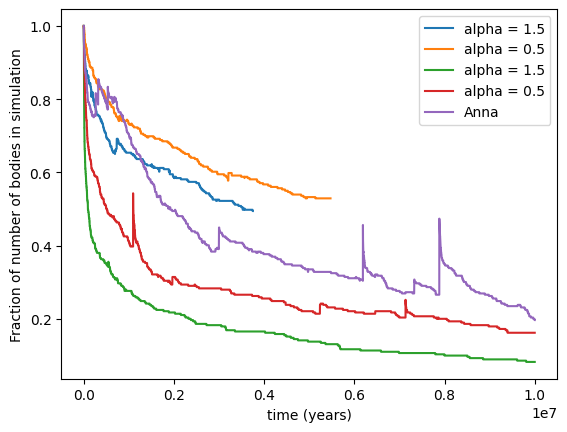

In [5]:
#Plots of number of bodies versus time, for alpha = 1.5

plt.plot(nd03_n['t'], nd03_n['n_bodies']/nd03_n['n_bodies'][0], label='alpha = 1.5')
plt.plot(nd04_n['t'], nd04_n['n_bodies']/nd04_n['n_bodies'][0], label = 'alpha = 0.5')


plt.plot(nd01_n['t'], nd01_n['n_bodies']/nd01_n['n_bodies'][0], label='alpha = 1.5')
plt.plot(nd02_n['t'], nd02_n['n_bodies']/nd02_n['n_bodies'][0], label = 'alpha = 0.5')

plt.plot(anna_old_n['t'], anna_old_n['n_bodies']/(anna_old_n['n_bodies'][0]), label = 'Anna')

#plt.xlim(0,2e6)
plt.xlabel('time (years)')
plt.ylabel('Fraction of number of bodies in simulation')

plt.legend()
plt.show()

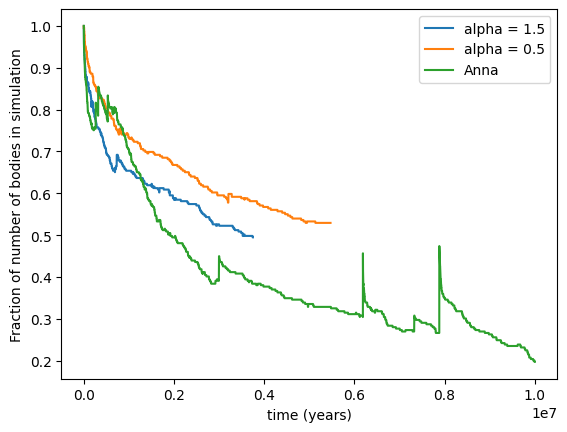

In [6]:
#Plots of number of bodies versus time, for alpha = 1.5

plt.plot(nd03_n['t'], nd03_n['n_bodies']/nd03_n['n_bodies'][0], label='alpha = 1.5')
plt.plot(nd04_n['t'], nd04_n['n_bodies']/nd04_n['n_bodies'][0], label = 'alpha = 0.5')


#plt.plot(nd01_n['t'], nd01_n['n_bodies']/nd01_n['n_bodies'][0], label='alpha = 1.5')
#plt.plot(nd02_n['t'], nd02_n['n_bodies']/nd02_n['n_bodies'][0], label = 'alpha = 0.5')

plt.plot(anna_old_n['t'], anna_old_n['n_bodies']/(anna_old_n['n_bodies'][0]), label = 'Anna')

#plt.xlim(0,2e6)
plt.xlabel('time (years)')
plt.ylabel('Fraction of number of bodies in simulation')

plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

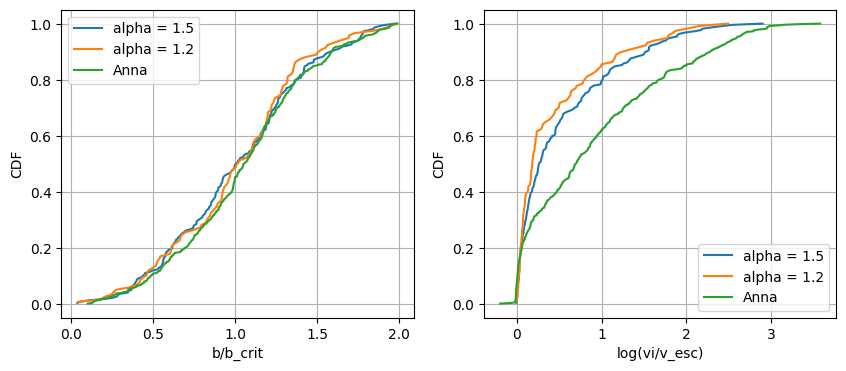

In [7]:
#CDF functions
plt.clf()

df0_b, cdf0_b = rr.make_cdf(nd03_b)
df1_b, cdf1_b = rr.make_cdf(nd04_b)
anna_df_b, anna_cdf_b = rr.make_cdf(anna_cut_b)

df0_v, cdf0_v = rr.make_cdf(nd03_v)
df1_v, cdf1_v = rr.make_cdf(nd04_v)
anna_df_v, anna_cdf_v = rr.make_cdf(anna_cut_v)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(df0_b, cdf0_b, label = 'alpha = 1.5')
plt.plot(df1_b, cdf1_b, label = 'alpha = 1.2')
plt.plot(anna_df_b, anna_cdf_b, label = 'Anna')
plt.grid(True)
plt.xlabel('b/b_crit')
plt.ylabel('CDF')
plt.legend()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 1st subplot

plt.plot(np.log(df0_v), cdf0_v, label = 'alpha = 1.5')
plt.plot(np.log(df1_v), cdf1_v, label = 'alpha = 1.2')
plt.plot(np.log(anna_df_v), anna_cdf_v, label = 'Anna')
plt.grid(True)
plt.xlabel('log(vi/v_esc)')
plt.ylabel('CDF')
plt.legend()


plt.show()

<Figure size 640x480 with 0 Axes>

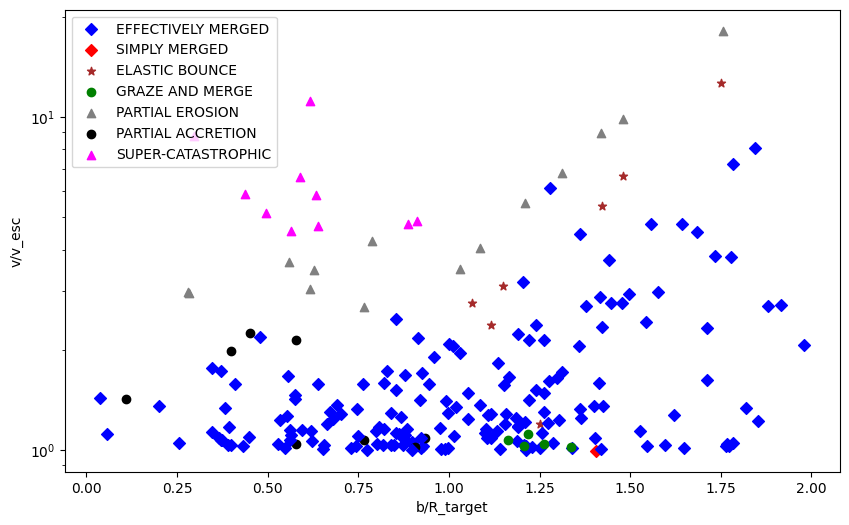

<Figure size 640x480 with 0 Axes>

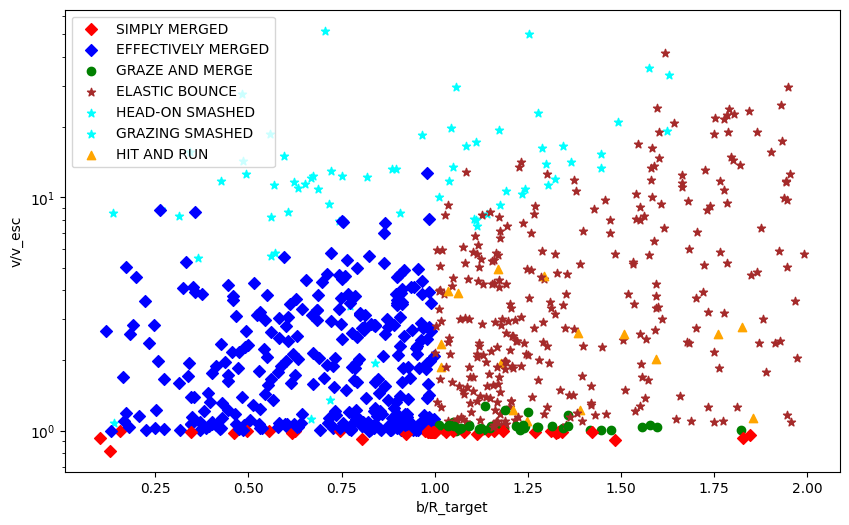

In [8]:
rr.plot_b_v(nd03_b, nd03_v, nd03_tt['coll_types'])
rr.plot_b_v(anna_old_b, anna_old_v, anna_old_tt['coll_types'])

Chambers

In [9]:
cham_01tt, cham_01n = rr.extract_data_outfile('../../data/collision_reports/nov 18/chambers_01.out')
cham_01v, cham_01b = rr.extract_data_impact('../../data/collision_reports/nov 18/chambers_01.out')

cham_02tt, cham_02n = rr.extract_data_outfile('../../data/collision_reports/chambers_2.out')
cham_02v, cham_02b = rr.extract_data_impact('../../data/collision_reports/chambers_2.out')

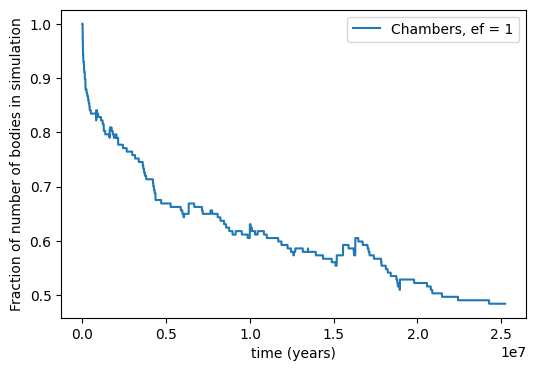

In [10]:
#Plots of number of bodies versus time, for alpha = 1.2
plt.figure(figsize=(6,4))


#plt.plot(inv_01n['t'], inv_01n['n_bodies']/inv_01n['n_bodies'][0], label = 'Inverse CDF, alpha=1.5')
#plt.plot(inv_02n['t'], inv_02n['n_bodies']/inv_02n['n_bodies'][0], label = 'Inverse CDF, alpha=0.5')
#plt.plot(anna_old_n['t'], anna_old_n['n_bodies']/(anna_old_n['n_bodies'][0]), label = 'Anna')
plt.plot(cham_01n['t'], cham_01n['n_bodies']/cham_01n['n_bodies'][0], label = 'Chambers, ef = 1')
#plt.plot(cham_02n['t'], cham_02n['n_bodies']/cham_02n['n_bodies'][0], label = 'Chambers, ef = 5')

#plt.xlim(0,10e6)
plt.xlabel('time (years)')
plt.ylabel('Fraction of number of bodies in simulation')

plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

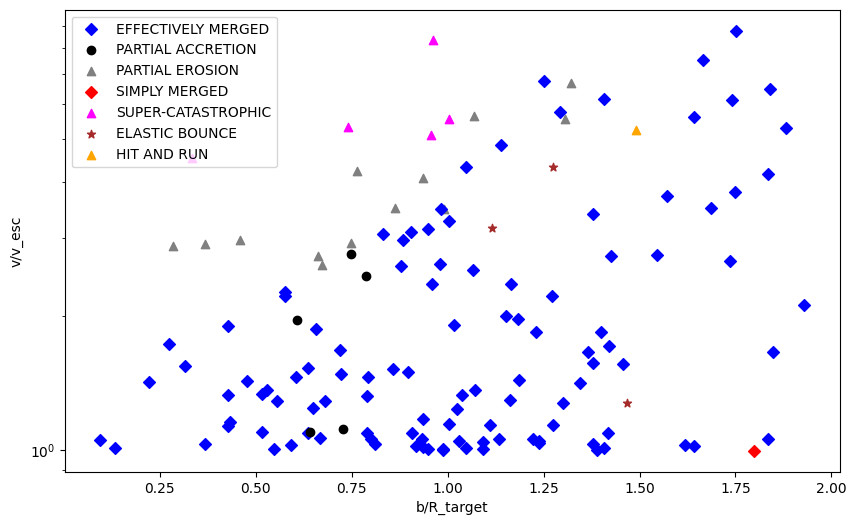

In [11]:
rr.plot_b_v(cham_01b, cham_01v, cham_01tt['coll_types'])

<Figure size 640x480 with 0 Axes>

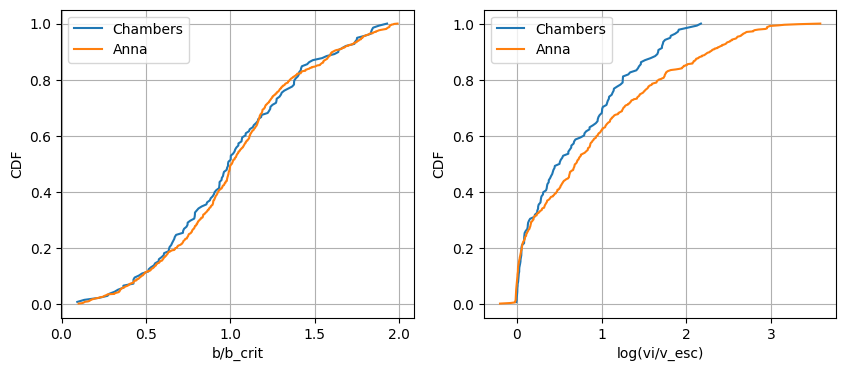

In [12]:
#CDF functions
plt.clf()

df_cham1_b, cdf_cham1_b = rr.make_cdf(cham_01b)
anna_df_b, anna_cdf_b = rr.make_cdf(anna_old_b)

df_cham1_v, cdf_cham1_v = rr.make_cdf(cham_01v)



plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(df_cham1_b, cdf_cham1_b, label = 'Chambers')
plt.plot(anna_df_b, anna_cdf_b, label = 'Anna')
plt.grid(True)
plt.xlabel('b/b_crit')
plt.ylabel('CDF')
plt.legend()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 1st subplot

plt.plot(np.log(df_cham1_v), cdf_cham1_v, label = 'Chambers')
plt.plot(np.log(anna_df_v), anna_cdf_v, label = 'Anna')
plt.grid(True)
plt.xlabel('log(vi/v_esc)')
plt.ylabel('CDF')
plt.legend()


plt.show()

After changing the code for b

In [13]:
childs_ed_tt, childs_ed_n = rr.extract_data_outfile('../../data/collision_reports/nov 18/childs_edited_01_ef5.out')

childs_ed_v, childs_ed_b = rr.extract_data_impact('../../data/collision_reports/nov 18/childs_edited_01_ef5.out')

<Figure size 640x480 with 0 Axes>

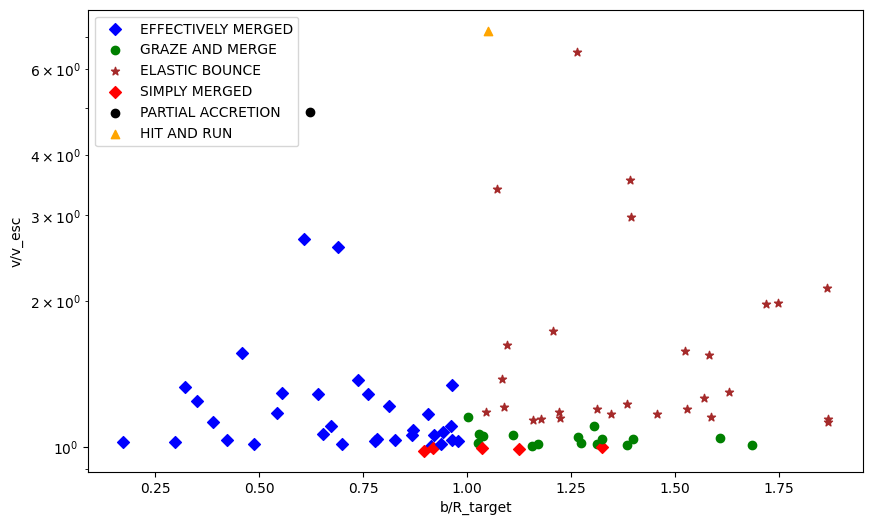

In [14]:
rr.plot_b_v(childs_ed_b, childs_ed_v, childs_ed_tt['coll_types'])

<Figure size 640x480 with 0 Axes>

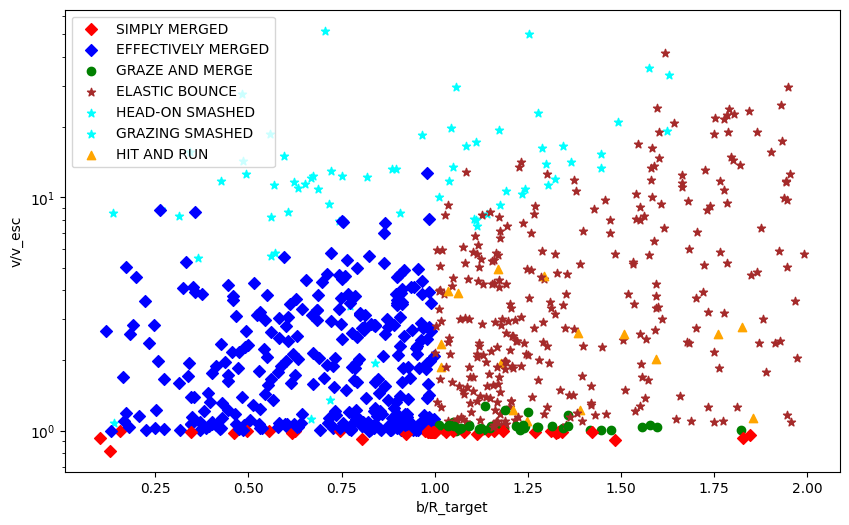

In [15]:
rr.plot_b_v(anna_old_b, anna_old_v, anna_old_tt['coll_types'])

<Figure size 640x480 with 0 Axes>

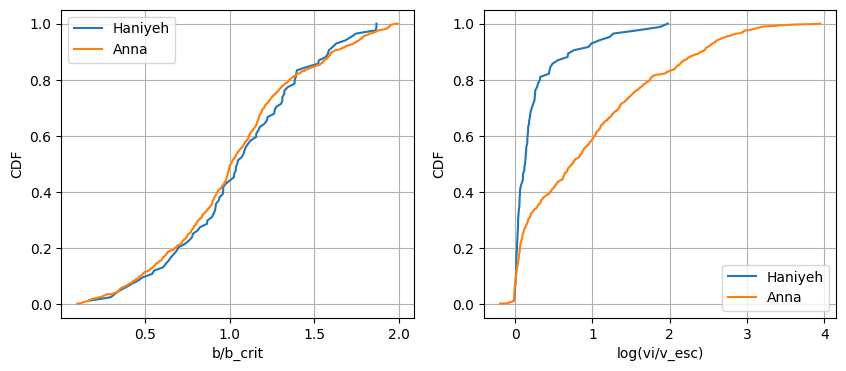

In [17]:
#CDF functions
plt.clf()

anna_df_b, anna_cdf_b = rr.make_cdf(anna_old_b)
anna_df_v, anna_cdf_v = rr.make_cdf(anna_old_v)

df_b, cdf_b = rr.make_cdf(childs_ed_b)
df_v, cdf_v = rr.make_cdf(childs_ed_v)



plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(df_b, cdf_b, label = 'Haniyeh')
plt.plot(anna_df_b, anna_cdf_b, label = 'Anna')
plt.grid(True)
plt.xlabel('b/b_crit')
plt.ylabel('CDF')
plt.legend()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 1st subplot

plt.plot(np.log(df_v), cdf_v, label = 'Haniyeh')
plt.plot(np.log(anna_df_v), anna_cdf_v, label = 'Anna')
plt.grid(True)
plt.xlabel('log(vi/v_esc)')
plt.ylabel('CDF')
plt.legend()


plt.show()

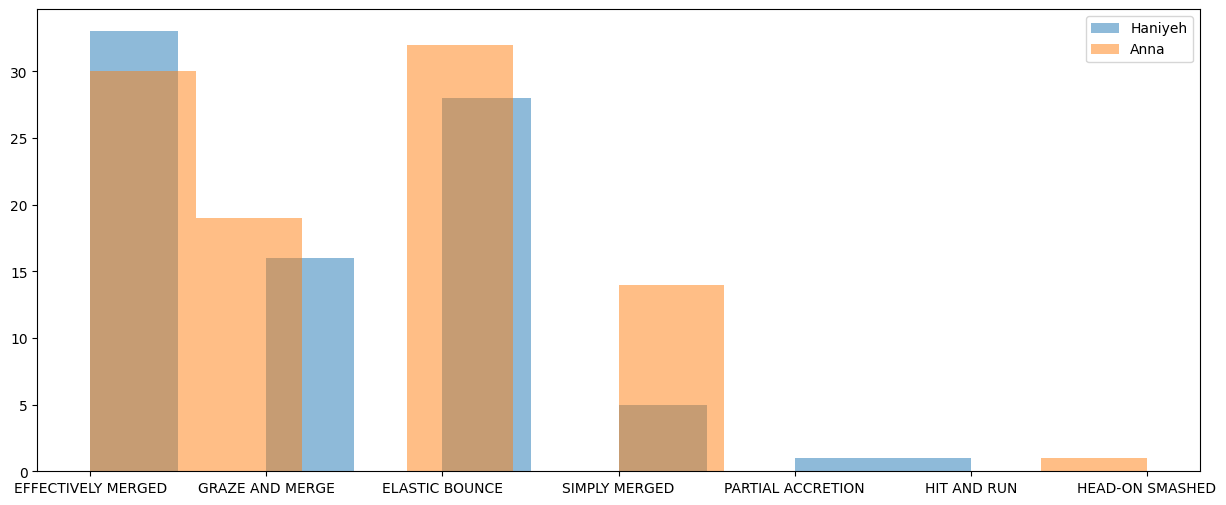

In [23]:
plt.figure(figsize=(15,6))

anna_cut_types = anna_old_tt[anna_old_tt['coll_times'] < 152600]
plt.hist(childs_ed_tt['coll_types'], alpha = 0.5, label = 'Haniyeh')
plt.hist(anna_cut_types['coll_types'], alpha = 0.5, label = 'Anna')


plt.legend()

plt.show()